<a href="https://colab.research.google.com/github/michalis0/DataScience_and_MachineLearning/blob/master/Week_3/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Sklearn import
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.model_selection import KFold, cross_val_score # Cross validation
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.preprocessing import PolynomialFeatures # Polynomial features
from sklearn.preprocessing import LabelEncoder #Label encoding
from sklearn.preprocessing import OneHotEncoder # 1-hot encoding
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.linear_model import Lasso # Lasso model
from sklearn.linear_model import Ridge # Ridge model
from sklearn.linear_model import LassoCV # Lasso with cross validation
from sklearn.linear_model import RidgeCV # Ridge with cross validation
from sklearn.linear_model import ElasticNet # ElasticNet model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Metrics for errors

## Content

The goal of this walkthrough is to provide you with insights on regression. After presenting the main concepts, you will be introduced to the techniques to implement these concepts in Python. Finally, it will be your turn to practice, using an application on energy efficiency.

## Background

### Objective

The goal of a regression is to estimate the relationships between a dependent variable (aka outcome, response, or label) and one or more independent variables (aka features, predictors, or explanatory variables).

Why?
- Predict outcome values
- Causal inference: analyze causal relation, for instance to provide policy recommendations
- Test a model / hypothesis
- ...


### A quick word on econometrics vs Machine Learning

- Machine Learning and Econometrics both gather a collection of methods, including (linear) regression, that can be used to answer a research question.
- The roots of ML is computer sciences while Econometrics is applied statistics, but...
- ...each field shares a lot: they are built on a similar mathematical bricks such as linear algebra, optimization, statistics & probability theory
- They (generally) differ on their goal and approach used:
    - Econometrics is often interested in causal interpretation. To do so, you make assumptions about how your data was generated (i.e., from which distribution)
    - The goal of ML is prediction accuracy. To do so, you train an algorithm on a subset of your data and then test this model (and train again...)
- That being said, this is an oversimplification since there are strong overlaps between the two: e.g. ML can also be interested in causality and ML algorithms make (implicit) assumptions.

### Model

Suppose we have *n* observations of an outcome $\boldsymbol{y}$ and *d* associated features $\boldsymbol{x_1}$, $\boldsymbol{x_2}$, ... , $\boldsymbol{x_d}$ (note that $\boldsymbol{y}$, $\boldsymbol{x_1}$, ..., $\boldsymbol{x_d}$ are vectors):

| | Outcome | Feature 1 | Feature 2 | ... | Feature d |
|:-------|:----------:|:----------:|:----------:|:----------:|:----------:|
| Observation 1 | $y_1$ | $x_{11}$ | $x_{12}$ | ... | $x_{1d}$ |
| Observation 2 | $y_2$ | $x_{21}$ | $x_{22}$ | ... | $x_{2d}$ |
| ... | ... | ... | ... | ... | ... |
| Observation n | $y_n$ | $x_{n1}$ | $x_{n2}$ | ... | $x_{nd}$ |

Regression is to relate feature variables to the outcome variable, to either predict outcomes for new observations and/or to understand the effect of the features on the output. For both goals, we need to find a function that approximates the output “well enough” given some inputs.

For instance, in the case of multivariate linear regression, we can write, for each observation $i$:
$$y_i = w_0 + w_1 x_{i,1} +  w_2 x_{i,2} + ... +  w_d x_{i,d} + \epsilon_i $$

Where $\epsilon_i$ is the error term, $w_0$ the intercept, and $w_1$, ... , $w_d$ the slope coefficients (i.e., weights) of each feature.

For each observation, we call our predicted value:
$$\hat{y_i}:=w_0 + w_1 x_{i,1} +  w_2 x_{i,2} + ... +  w_d x_{i,d}$$

In other words, we have: $y_i = \hat{y_i} + \epsilon_i $

More generally, let $f$ be our model function, $\boldsymbol{w}=(w_0, w_1, ..., w_d)$ the vector of weights, and $\boldsymbol{X}=[\boldsymbol{x_1}$, ... , $\boldsymbol{x_d}]$ the matrix of feature variables. For all observations, we have, with $\boldsymbol{X_{i*}}$ the $i^{th}$ row:

$$\hat{y_i} := f(\boldsymbol{X_{i*}}, \boldsymbol{w})$$

In our illustration, we have focused on a multivariate linear regression, but the formulation will be the same for more complex models, such as neural networks, which we will see later in this course.

Now our objective is to find the predicted values $\hat{y_i}$ that are the closest to the observations $y_i$. In other words, we want to minimize the errors $\epsilon_i = y_i - \hat{y_i}$. There are several possible techniques. Below, we present the simplest one, namely the *least squares* problem.

#### Least squares problem

The idea is to minimize the sum of squared residuals (aka RSS - Residual Sum of Squares):

$$ \min_\boldsymbol{w} \sum_{i=1}^n (y_i - \hat{y_i})^2 = \min_\boldsymbol{w} \sum_{i=1}^n (y_i - f(\boldsymbol{X_{i*}}, \boldsymbol{w}))^2 $$

Graphically, for a simple linear regression, we minimize the area of the squares between our observation and our predicted value:  

<img src='https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg' width="600">

Source: [Wikipedia - Coefficient of determination. Author: Orzetto](https://commons.wikimedia.org/wiki/File:Coefficient_of_Determination.svg)

The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ informs about the goodness of fit: $R^2= 1 -\frac{\color{blue}{RSS}}{\color{red}{TSS}} $
- Residual Sum of Squares: $\color{blue}{RSS=\sum_i (y_i - \hat{y_i})^2}$
- Total Sum of Squares: $\color{red}{TSS=\sum_i (y_i - \bar{y})^2}$

When $R^2=1$, then $RSS=0$, meaning all the errors are equal to zero, and the model gives "perfect" prediction.  
When $R^2=0$, then $RSS=TSS$, hence our model is not more informative that taking the average of our observations.

The prediction errors will generally decrease with the complexity of the model, e.g., with more features. But what could go wrong?
- The prediction error decreases but... there is a risk of overfitting: the model cannot be generalized!
- There may be no solutions (risk of multicollinearity of matrix $\boldsymbol{X}$)

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*WXi_7HIL3FKETFdfegcEmA.png' width="600">

Source: Ann Sajee, [Model complexity accuracy and interpretability, Towards Data Science](https://towardsdatascience.com/model-complexity-accuracy-and-interpretability-59888e69ab3d)

#### Regularization <a id='model-regul'></a>

Our objective is to tackle the limitations of the least square problem, in particular [overfitting](https://en.wikipedia.org/wiki/Overfitting). An overfitted model contains more parameters than can be justified by the data.

What can we do? One technique is called [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics))

The general idea is to put an additional constraint - or penalty - on our parameters $\boldsymbol{w}$, instead of optimizing only on the errors. Here is the new problem formulation:

$$ \min_\boldsymbol{w} L(\boldsymbol{y}, \boldsymbol{X}, \boldsymbol{w}) + \lambda R(\boldsymbol{w}) $$

- $L(\boldsymbol{y}, \boldsymbol{X}, \boldsymbol{w})$ is the **loss** function. It measures the prediction error.
    - For instance, we can use the least square loss function:
$ L(\boldsymbol{y}, \boldsymbol{X}, \boldsymbol{w}) = \frac{1}{n} \sum_i^n (y_i - f(\boldsymbol{X_{i*}}, \boldsymbol{w}))^2 $
- $\lambda$ is the penalty term
- $R(\boldsymbol{w})$ is the **regularization** function that constrains the model, typically penalizing the parameters $w_0$, $w_1$, ..., $w_d$. What regularization function should we use? Below are some common examples...

**LASSO**  regression, standing for "Least Absolute Selection and Shrinkage", is using the 1-norm ([absolute value norm](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Absolute-value_norm)) of the parameters as regularization function:
$$ R(\boldsymbol{w})= \sum_{j=1}^d |w_j| $$

- Pros
    - Force most entries of $\boldsymbol{w}$ to be 0. In other words, there is selection effect, and the technique is preferred when $\boldsymbol{w}$ is expected to be sparse
    - It enables to do a linear regression when there are more features than observations ($d > n$)
- Cons
    - Arbitrary selection among highly correlated variables
    - Selects at most $n$ features when more features than observations ($d > n$)
    - Features with small $w_j$ values will be forced to zero

**Ridge** regression is using the square of the 2-norm ([Euclidean norm](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Euclidean_norm)) of the parameters as regularization function: $$R(\boldsymbol{w})= \sum_{j=1}^d w_j^2 $$

- Pros
    - More stable solution (shrink parameters estimate). This method is thus preferred when $\boldsymbol{w}$ is expected to take small values
    - It enables to do a linear regression when there are more features than observations ($d > n$)
- Cons
    - Less sensitive to data
    - $\boldsymbol{w}$ is typically still not sparse

**Elastic net** regression is using a linear combination of Ridge and Lasso: $$ R(\boldsymbol{w})= \lambda_1 \sum_{j=1}^d |w_j| + \lambda_2 \sum_{j=1}^d w_j^2 $$

- Pros
    - Ridge term makes the problem convex (unique solution)
    - Overcome some of the limitations of LASSO: can select group of highly correlated variables and more than $n$ features when more features than observations ($d > n$)


#### Why LASSO leads to feature selection?

In the previous section, we have state that LASSO regression forces weights to zero, hence selecting features, while Ridge was shrinking parameters. Why is that? The answer lies in the shape of the functions. Mathematically, the ridge regularization function is convex while LASSO is not.

What does it imply? Let's see graphically, in a model with two features:
$$ y_i= w_1 x_{i,1} + w_2 x_{i,2} + \epsilon_i $$

The least square loss function is quadratic:
$$L(w_1, w_2) = \sum_i^n (y_i - w_1 x_{i,1} - w_2 x_{i,2})^2$$

Hence, plotted in a plan, our "indifference curves" (i.e., the curves such that the loss function is equal to a given value) would look like elliptical contours - see figure below, in red. Without regularization, our optimum would be located at the center of the ellipse.

What happens when we add a regularization term? We transform our minimization problem. Mathematically, adding the regularization term is equivalent to adding a constraint on the weights:
- LASSO: $|w_1| + |w_2| \leq t$
- Ridge: $w_1^2 + w_2^2 \leq t$

Graphically, LASSO constraint looks like a diamond (cyan) while Ridge constraint is a disk (green).

When we relaxed the constraints, the constrained regions (diamond and disk) get bigger, and can eventually hit the center of the ellipse. In such case, the optimum weights are the one obtained without regularization.

Otherwise, the optimum weights are obtained at the intersection of the elliptical contours and of the constrained regions. With LASSO, this intersection will happen at one of the corners of the diamond, i.e., when one of the weight is equal to zero. With Ridge, the intersection will happen at one point of the circle: while the values of the weights are shrunk, they will (almost) never be exactly zero.

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Jd03Hyt2bpEv1r7UijLlpg.png' width="600">

Source: [Ridge and Lasso Regression: L1 and L2 Regularization](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b), Saptashwa Bhattacharyya, Towards Data Science

### Solving our model: learning parameters via gradient descent

To find the solution of our problem, we use numerical optimization: we search the minimum by iteration. Recall the optimization problem we want to solve: minimize the prediction errors (loss function), with a constraint on our parameters (regularization function).

$$ \min_\theta L(\boldsymbol{y}, \boldsymbol{X}, \boldsymbol{w}) + \lambda R(\boldsymbol{w}) $$

We call $J$ our objective function (also called cost function) $J:= L + \lambda R$

One possible numerical method to solve this problem is the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). It is an optimization algorithm with iterative updating rule:

0. We first start with an initial value $\boldsymbol{w^0}=(w^0_0, w^0_1,...,w^0_d)$, selected at random or a best guess
1. We update our parameters: $\boldsymbol{w^{k+1}}=\boldsymbol{w^{k}}+ \gamma \nabla (J[\boldsymbol{w^{k}}])$
    - $\gamma$ is the learning rate
    - $\nabla (J[\boldsymbol{w^{k}}])$ is the gradient, i.e., the derivatives of $J$ with respect to $w_0$, $w_1$, ..., $w_d$; and evaluated at $\boldsymbol{w^{k}}$
2. We continue until a given convergence criteria is obtained (fixed point)

There are many other methods, but they often consist in tweaking the updating rule.

<img src='https://saugatbhattarai.com.np/wp-content/uploads/2018/06/gradient-descent-1.jpg' width="400">
    

Source: Saugat Bhattarai, [What is Gradient Descent in Machine Learning?](https://saugatbhattarai.com.np/what-is-gradient-descent-in-machine-learning/#:~:text=June%2022%2C%202018%20Saugat%20Bhattarai,basically%20valley%20in%20a%20graph.)

# Regression


There is a library in Python that we will be using for linear regression and machine learning in general. The **sklearn** library. Here is the [documentation](https://scikit-learn.org/stable/user_guide.html) and the [installation guide](https://scikit-learn.org/stable/install.html) if necessary.

Here are the steps to follow when you want to train a model on a dataset:


1.   Import and clean your dataset
2.   Preprocessing: split the dataset between the training set (80% of the data) and the test set (20% of the data), scaling and encoding
3.   Create and fit the model
4.   Predict new observations and evaluate the model using the test set



## Import and clean

In this section, we will use the weather dataset, which contains weather data e.g., temperature, wind speed, humidity, rain in Canberra between November 2007 and October 2008. Let's load and explore our dataset. The file is available in the git repository.

In [ ]:
#Load the dataset
url = "https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/03-regression/data/weather.csv"
weather = pd.read_csv(url).drop_duplicates().dropna() # drop duplicates and NaN values

# Display a sample of the data
display(weather.head())

#Print the data types
print(weather.dtypes)

Note that the dataset contains numerical variables (e.g., temperature, rainfall, humidity, pressure) and categorial variables (e.g., wind direction). In addition, we have weather data at 9am and 3pm. We will only work with values concerning 3pm for simplicity. Let's get some summary statistics:

In [ ]:
# Select features of interest
weather3pm = weather.loc[:,['Temp3pm','Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'WindSpeed3pm', 'WindDir3pm', 'Sunshine', 'Rainfall']]

# Summary statistics
display(weather3pm.describe())

# Correlation matrix
display(weather3pm.corr(numeric_only = True))

## Your turn !

Now it's your turn to play with ML algorithms! In this application, you will study the energy efficiency of buildings. More precisely, you will try to predict the heating loads of buildings based on the following features:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution

You will use the [Energy-Efficiency-Dataset](https://www.openml.org/search?type=data&status=active&id=43338), created by Angeliki Xifara, processed by Athanasios Tsanas, and made available on [OpenML](https://www.openml.org/), an open platform for sharing datasets, algorithms, and experiments. The csv file is available [here](https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Week_3/data/energy-efficiency.csv).


Import the dataset, store it into a dataframe and look at some statistics and the correlation matrix.


In [ ]:
# Write your code here

## Linear Regression

We will first implement a simple (univariate) linear regression. Our goal in this section will be to try to predict the temperature given the level of humidity:

$$Temperature_i = w_0 + w_1 Humidity_i + \epsilon_i$$

In [ ]:
X = weather3pm[['Humidity3pm']]
y = weather3pm[['Temp3pm']]

#### Splitting the dataset <a id='linear-split'></a>

Sklearn has a very useful module to separate your dataset in a training and in a testing set called `train_test_split` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Here is how to import it (already done at the beginning of the notebook)

```python
from sklearn.model_selection import train_test_split
```

The training set will be used to retrieve the best values of the weights $w_0$ and $w_1$ according to a combination of input (humidity) and output (temperature) observations. The test set will be used to evaluate/predict our model. Since our model will be trained on particular values we want to test our data on a new set of data (the test set).

The test size here is of 20% of the original data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

Notice the syntax: as arguments we provide our matrix of features (here, 'Humidity3pm' vector), our outcome vector (here, 'Temp3pm), the size of the test set (20%). We also shuffle the data before splitting to avoid potential bias, and we control how this shuffling is applied by providing a random state, in order to obtain reproducible output across multiple function calls.

#### Create and Fit model <a id='linear-train'></a>

To predict the output variable we will use a simple linear regression, the module is called `LinearRegression` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)). Here is the import line:

```python
from sklearn.linear_model import LinearRegression
```
We follow three steps:
1. Create a new `LinearRegression` model from sklearn
2. Fill the linear model from the X_train (feature) and the y_train data (target) using the `fit()` function
3. Check the model accuracy using the `score()` function, which returns the coefficient of determination $R^2$ of the prediction. The best possible score is 1 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.

In [ ]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression(fit_intercept= True)
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))

After fitting the model, we can easily retrieve the values of the different weights coefficients (the intercept, and the weight of each feature):

In [ ]:
print("Intercept: ", model.intercept_[0])
print("Features coefficients (weigths): ", model.coef_.flatten()[0])

The intercept corresponds to the value of $w_0$. There is only one coefficient,  $w_1$ linked to the humidity feature. Since we have only one value for intercept and coefficients represented as arrays, we apply `flatten()` and `[0]`.

(For those who are wondering what *fit_intercept* is doing, here is an image that will make you understand it more easily. If it is true, the line will pass through the origin, otherwise it will not necessarily):
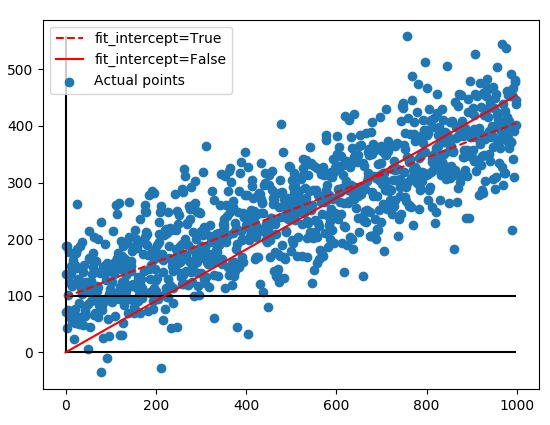

#### Prediction and Evaluation <a id='linear-test'></a>

Once the model is trained, we can use the `predict()` function to predict the values of the test set using `X_test`. This prediction can be compared to the truth value, i.e., `y_test`. Let's try with one value of the test set. Note that our model takes a matrix as inputs (X matrix), so even if we want to predict a scalar value we should use `[[...]]`.

In [ ]:
humidity_test = X_test.iloc[0].values[0]
temperature_predicted = model.predict([[humidity_test]]).flatten()[0]
temperature_test = y_test.iloc[0].values[0]
print(f"Prediction/observed temperature for humidity {humidity_test}: {temperature_predicted:.1f}°C vs {temperature_test}°C")

To better understand how the prediction and actual values differ, we can plot the predictions (line) and the true values from the test set (dots). It is more interesting to predict from the test set because our model is not trained on these values unlike the train set.

In [ ]:
#Model prediction from X_test
predictions = model.predict(X_test)

In [ ]:
# Plot the prediction (the line) over the true value (the dots)
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, 'r')
plt.title("Humidity level against temperature")
plt.xlabel('Humidity level')
plt.ylabel('Temperature °C')
plt.show()

We can compare the error of our model by using some metrics like the **MAE (mean absolute error)**, **MSE (mean squared error)** or **coefficient of determination $R^2$** score. Sklearn offers some nice modules to compute these measures ([MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error), [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error), [$R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)).
Here is the import line:

```python
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
```

These metrics takes the `y_test` values and the `predictions` as arguments. Basically it will analyse how far the prediction is from the true value. Using these metrics is very helpful when comparing the performance of model.

In [ ]:
# Compute the MAE, the MSE and the R^2
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:0.2f}")
print(f"MSE: {mse:0.2f}")
print(f"R\u00b2: {r2:0.2f} " )

It is also interesting to compare the results of these metrics between the data from the *test set* and those from the *train set* to see whether our model generalizes well:

In [ ]:
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE train set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE train set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 train set: {r2_train:0.2f};" )

Remember, the higher the $R^2$ value, the better the fit. In this case, the testing data yields a higher coefficient as well as lower mean absolute and mean squared errors. While it might seem a bit counterintuitive, one possible explanation lies in the observations selected when we split our dataset into training/test set. One remedy would be to rely on cross validation.

## Multivariate linear regression

We will now apply the same method to several features, namely, humidity, pressure, wind speed, wind direction, sunshine, rainfall, and cloud data to predict the temperature, still at 3pm.

In [ ]:
X = weather[['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'WindSpeed3pm', 'WindDir3pm', 'Sunshine', 'Rainfall']]
y = weather[['Temp3pm']]

### Splitting dataset <a id='multivariate-split'></a>

We apply the same procedure as before:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### Preprocessing: encoding categorical variables

The feature 'WindDir3pm' is a categorical variable. To use it in our model, we need to encode it. Here, we will use a label encoding, using the sklearn module `LabelEncoder`. As an alternative, we could use 1-hot encoding, with the sklearn module `OneHotEncoder`. Here are the import lines:

```python
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
```

**Note:** You should encore your data after splitting the dataset to avoid data leakage (train-test contamination), first transforming the training set and then the test set based on the encoding maps from train data.

In [ ]:
print(X_train[['WindDir3pm']])
# Extract the column of interest
wind_dir_3pm = X_train[['WindDir3pm']].values.ravel()
wind_dir_3pm_test = X_test[['WindDir3pm']].values.ravel()
#Define the encoder
le = LabelEncoder()
#Fit the encoder
le.fit(wind_dir_3pm)
#Transform the train and the test set
X_train = X_train.assign(WindDir3pm=le.transform(wind_dir_3pm))
X_test = X_test.assign(WindDir3pm=le.transform(wind_dir_3pm_test))
print(X_train[['WindDir3pm']])

### Rescaling

Next, we rescale our data.

**Note:** Generally you should normalize the data right after splitting the dataset. The normalization is important here to reduce the variance of our model and get better results.

We can use the sklearn `MinMaxScaler` module to normalize the data. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. Here is the import line:

```python
from sklearn.preprocessing import MinMaxScaler
```

In [ ]:
#Define the scaler
scaler = MinMaxScaler()
#Fit the scaler
scaler.fit(X_train)
#Transform the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Note that these two steps can be merged into one (only for the train set)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Create and Fit model <a id='multivariate-train'></a>

We follow the same steps as before:

In [ ]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))
# 4. Print the coefficients of the linear model
print("Intercept: ", model.intercept_[0])
model_coeff = pd.DataFrame(model.coef_.flatten(),
                     index=['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'WindSpeed3pm', 'WindDir3pm', 'Sunshine', 'Rainfall'],
                     columns=['Coefficients multivariate model'])
model_coeff # Get the coefficients, w

The coefficient values inform us about the relative importance of each feature for our prediction.

### Prediction and evaluation <a id='multivariate-test'></a>

Finally, we evaluate our model performance following the same procedure as before:

In [ ]:
# Predict:
predictions = model.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

The mean absolute error and mean squared error in our multivariate analysis are lower than in the univariate case: as expected, adding more complexity (features) seemed to have improved our prediction.

Note that you should not use the $R^2$ to compare several models since the indicator is sensitive to the number of features. Instead, you can for instance use the [Adjusted $R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2).

## Your turn

Using the dataset of the energy efficiency seen in the previous *Your Turn*, predict the heating load using all the other features.
(Cooling load is not a feature).
Calculate the MAE, the MSE and the $R^2$ of your model on the test set.

In [ ]:
# Write your code here

## Polynomial linear regression

Using polynomial regression enables you to predict the best fit line that follows the pattern (curve) of the data. It tends to increase the performance of the model. We are using the module  `PolynomialFeatures` to preprocess our data ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)):

```python
from sklearn.preprocessing import PolynomialFeatures
```

The function `PolynomialFeatures` generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [ ]:
# We will use a degree 2
poly = PolynomialFeatures(2)
# Transform our training and test set
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Feature name:
X_poly_features = poly.get_feature_names_out(['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'WindSpeed3pm', 'WindDir3pm', 'Sunshine', 'Rainfall'])
print(X_poly_features)

Now we proceed as before, performing a linear regression:

In [ ]:
# Set up the model
model_poly = LinearRegression(fit_intercept=False) # we don't need fit intercept since polynomial features function add a column of ones to the data

# Fit
model_poly.fit(X_train_poly, y_train)

# Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model_poly.score(X_train_poly, y_train), 3))

# Print the coefficients of the linear model
model_coeff = pd.DataFrame(model_poly.coef_.flatten(),
                     index=X_poly_features,
                     columns=['Coefficients polynomial model'])
model_coeff # Get the coefficients, w

Finally, we evaluate the performance of our model:

In [ ]:
# Predict:
predictions = model_poly.predict(X_test_poly)

# Compute the MAE, the MSE and the R^2 on the test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = model_poly.predict(X_train_poly)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

The mean absolute and mean square errors on the test set decreased.

However, beware, adding too many features may cause overfitting. Remember that overfitting is is the tendency of data mining procedures to tailor models to the training data, at the expense of generalization to previously unseen data points.

For instance, if we were to use polynomial features with a degree 3, the mean absolute and mean square errors on the training set would decrease, but the errors on the test set would dramatically increase - and the $R^2$ on the test set would even be negative. Try it!

To avoid such issue, we can implement some regularization techniques.

## Regularization <a id='implement-regul'></a>

We will now implement some regularization techniques discussed above, in combination of our previous polynomial linear regression.

### Lasso

We can use the sklearn `Lasso` module to implement a Lasso regularization ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)). Here is the import line:

```python
from sklearn.linear_model import Lasso
```

The procedure is the same as before. Since we already split our dataset and preprocessed our training and test sets, we can create the model, fit it, and then evaluate its performance.

When creating the model, we can specify the penalty term, `alpha` as an argument of `Lasso()`:

In [ ]:
# Set up the model
lasso_model = Lasso(alpha=0.2, fit_intercept=False)

# Use fit
lasso_model.fit(X_train_poly, y_train)

# Check the score/accuracy
print("R\u00b2 Score of the model: ", round(lasso_model.score(X_train_poly, y_train), 3))

# Print the coefficients of the linear model
model_coeff = pd.DataFrame(lasso_model.coef_.flatten(),
                     index=X_poly_features,
                     columns=['Coefficients Lasso model'])
model_coeff

Notice the weights? Most of them were forced to zero, meaning our model will not use the corresponding features for its prediction. The intuition here is that the corresponding features hadn’t provided enough predictive power to be worth considering alongside the other features.

Let's keep going with the evaluation of the model:

In [ ]:
# Predict:
predictions = lasso_model.predict(X_test_poly)

# Compute the MAE, the MSE and the R^2 on the test set
mae_lasso = mean_absolute_error(y_test, predictions)
mse_lasso = mean_squared_error(y_test, predictions)
r2_lasso = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = lasso_model.predict(X_train_poly)
mae_train_lasso = mean_absolute_error(y_train, predictions_train)
mse_train_lasso = mean_squared_error(y_train, predictions_train)
r2_train_lasso = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae_lasso:0.2f}; MAE training set: {mae_train_lasso:0.2f};")
print(f"MSE test set: {mse_lasso:0.2f}; MSE training set: {mse_train_lasso:0.2f};")
print(f"R\u00b2 test set: {r2_lasso:0.2f}; R\u00b2 training set: {r2_train_lasso:0.2f};" )

As a result of Lasso regularization, the MAE and MSE on the test set are increasing. Let's pursue our exploration with a Ridge regularization:

### Ridge

We can use the sklearn `Ridge` module to implement a Ridge regularization ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)). Here is the import line:

```python
from sklearn.linear_model import Ridge
```

We proceed as before:

In [ ]:
# Set up the model
ridge_model = Ridge(alpha=1.0, fit_intercept=False)

# Use fit
ridge_model.fit(X_train_poly, y_train)

# Check the score/accuracy
print("R\u00b2 Score of the model: ", round(ridge_model.score(X_train_poly, y_train), 3))

# Print the coefficients of the linear model
model_coeff = pd.DataFrame(ridge_model.coef_.flatten(),
                     index=X_poly_features,
                     columns=['Coefficients Ridge model'])
model_coeff['Coefficients Lasso model']=lasso_model.coef_.flatten()
model_coeff['Coefficients polynomial model']=model_poly.coef_.flatten()
model_coeff

Note how the coefficients with the Ridge regularization were shrinked, but not forced to zero as in the Lasso regularization.

Let's evaluate our new model.

In [ ]:
# Predict:
predictions = ridge_model.predict(X_test_poly)

# Compute the MAE, the MSE and the R^2 on the test set
mae_ridge = mean_absolute_error(y_test, predictions)
mse_ridge = mean_squared_error(y_test, predictions)
r2_ridge = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = ridge_model.predict(X_train_poly)
mae_train_ridge = mean_absolute_error(y_train, predictions_train)
mse_train_ridge = mean_squared_error(y_train, predictions_train)
r2_train_ridge = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae_ridge:0.2f}; MAE training set: {mae_train_ridge:0.2f};")
print(f"MSE test set: {mse_ridge:0.2f}; MSE training set: {mse_train_ridge:0.2f};")
print(f"R\u00b2 test set: {r2_ridge:0.2f}; R\u00b2 training set: {r2_train_ridge:0.2f};" )

Let's visualize the MAE and MSE on the test data obtained in our different models:

In [ ]:
model_comparison = pd.DataFrame([mae, mse], index=['MAE', 'MSE'], columns=['Polynomial model'])
model_comparison['LASSO']=[mae_lasso, mse_lasso]
model_comparison['Ridge']=[mae_ridge, mse_ridge]
model_comparison

The polynomial and Ridge models seem to perform similarly.

However, note that the regularization parameter $\alpha$ has a large impact on MAE and MSE in the test data. Moreover, the relationship between the test data MSE and $\alpha$ is complicated and non-monotonic. Hence, one popular method for choosing the regularization parameter is cross-validation, which we will implement below.

## Your turn

Using the energy efficiency dataset, train a linear regression model with Lasso regression and predict the Heating Load using all the other features.
What are the MAE, MSE and $R^2$ on the test data ?

In [ ]:
# Write your code here

## K-fold cross validation

Roughly speaking, cross-validation splits the training dataset into many training/testing subsets, then chooses the regularization parameter value that minimizes the average MSE.

More precisely, k-fold cross-validation does the following:

1. Partition the dataset randomly into k subsets/”folds”.  
2. Compute $MSE_j(\alpha)=$ mean squared error in j-th subset when using the j-th subset as test data, and other k-1 as training data.  
3. Minimize average (across folds) MSE $\min_\alpha \frac{1}{k}\sum_{j=1}^k MSE_j(\alpha)$.

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width="500">

You can find a more detailed description of cross-validation [here](https://scikit-learn.org/stable/modules/cross_validation.html).

We will implement cross validation in addition of our previous polynomial linear regression with ridge regularization. We are using the sklearn `RidgeCV` module ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)). Here is the import line:

```python
from sklearn.linear_model import RidgeCV
```

In case, a similar module exists for Lasso regularization with cross-validation, namely `LassoCV` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)).

With the argument `cv`, we can specify the number of folds:

In [ ]:
# Set up the model
ridge_cv_model = RidgeCV(cv=5, fit_intercept=False)

# Use fit
ridge_cv_model.fit(X_train_poly, y_train)

# Check the score/accuracy
print("R\u00b2 Score of the model: ", round(ridge_cv_model.score(X_train_poly, y_train), 3))

# Print the coefficients of the linear model
model_coeff['Coefficients Ridge-CV model']=ridge_cv_model.coef_.flatten()
model_coeff

As always, let's evaluate our model:

In [ ]:
# Predict:
predictions = ridge_cv_model.predict(X_test_poly)

# Compute the MAE, the MSE and the R^2 on the test set
mae_ridge_cv = mean_absolute_error(y_test, predictions)
mse_ridge_cv = mean_squared_error(y_test, predictions)
r2_ridge_cv = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = ridge_cv_model.predict(X_train_poly)
mae_train_ridge_cv = mean_absolute_error(y_train, predictions_train)
mse_train_ridge_cv = mean_squared_error(y_train, predictions_train)
r2_train_ridge_cv = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae_ridge:0.2f}; MAE training set: {mae_train_ridge:0.2f};")
print(f"MSE test set: {mse_ridge:0.2f}; MSE training set: {mse_train_ridge:0.2f};")
print(f"R\u00b2 test set: {r2_ridge:0.2f}; R\u00b2 training set: {r2_train_ridge:0.2f};" )

Let's compare our model to the previous ones:

In [ ]:
model_comparison['Ridge with Cross Validation']=[mae_ridge_cv, mse_ridge_cv]
model_comparison

By optimizing the regularization parameter, the MAE and MSE decreased a little.

## Your turn

Using the energy efficiency dataset, train a linear regression model with cross-validation and a regularization of your choice. What are the MAE, MSE, and $R^2$ on the test data ?

In [ ]:
# Write your code here